In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df = df.dropna()
df.shape

(5332, 12)

In [8]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
day_added                int64
mount_added              int64
year_added               int64
dtype: object

In [9]:
# TUGAS 4 TYPE
df_movies = df[df["type"]=="Movie"]
df_tvshows = df[df["type"]== "TV Show"]

In [10]:
# TUGAS 4 TYPE
df.type.value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

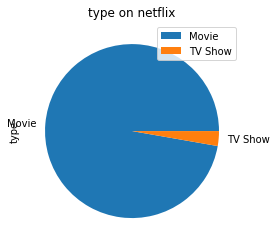

In [31]:
# TUGAS 4 TYPE
df.type.value_counts().plot(kind = 'pie')
plt.title("type on netflix")
plt.legend()
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'plot od Rating')

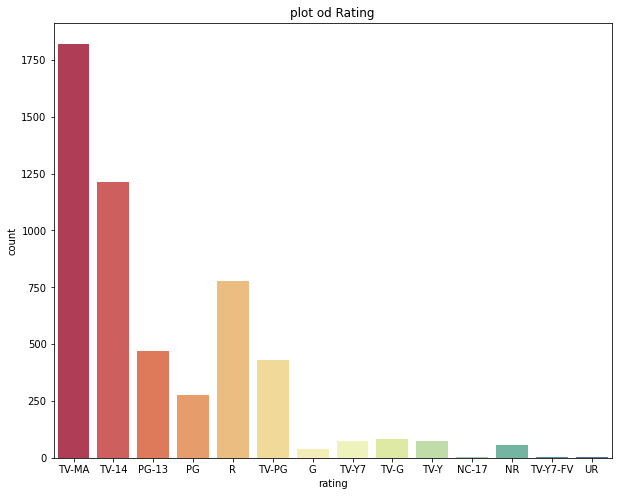

In [13]:
# TUGAS 3 RATING
plt.figure(figsize= (10,8))
sns.countplot(df.rating, palette= 'Spectral')
plt.title('plot od Rating')

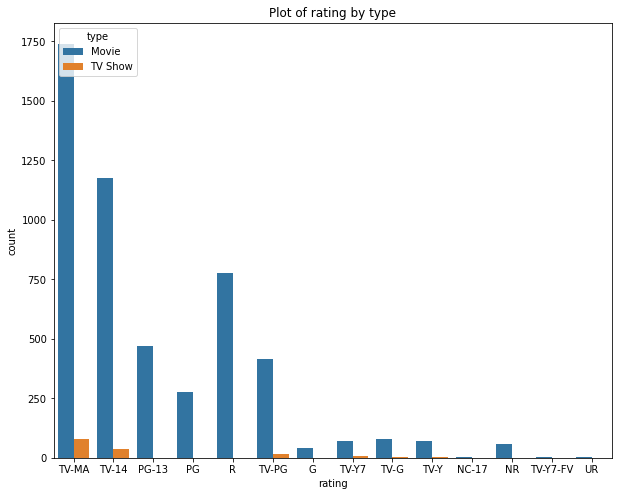

In [14]:
# Tugas 3 Rating
plt.figure(figsize=(10,8))
sns.countplot(x = 'rating', hue= 'type', data=df)
plt.title('Plot of rating by type')
plt.show()

In [15]:
# TUGAS 2 COUNTRY
df.country.value_counts()

United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: country, Length: 604, dtype: int64

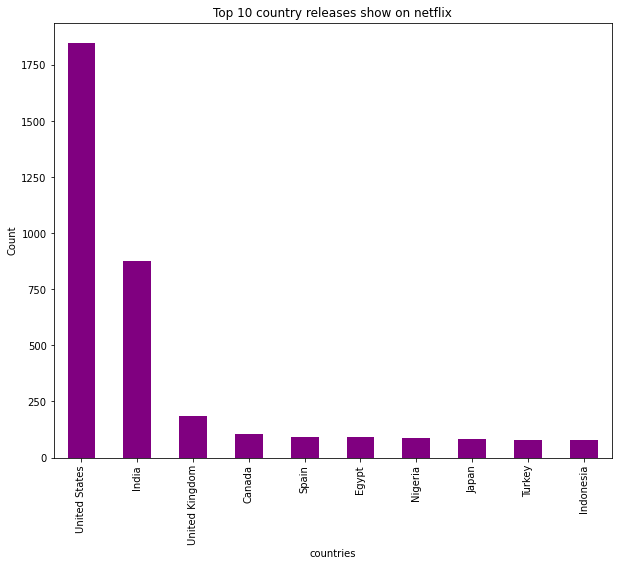

In [42]:
# tugas 2 country most show
plt.figure(figsize = (10,8))
df.country.value_counts().head(10).plot(kind='bar', color= 'purple')
plt.title('Top 10 country releases show on netflix')
plt.xlabel("countries")
plt.ylabel("Count")
plt.show()

In [21]:
# TUGAS 1 TOP GENRE
listed_in = df.listed_in.value_counts()
listed_in

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 335, dtype: int64

In [22]:
print('Most common category of movie realease\nDramas, international Movies : ', max(listed_in))

Most common category of movie realease
Dramas, international Movies :  336


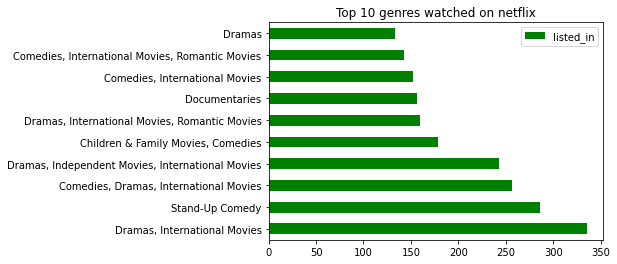

In [26]:
# tugas top genre
listed_in.head(10).plot(kind= 'barh', color='g')
plt.title("Top 10 genres watched on netflix")
plt.legend()

In [24]:
# install wordcloud
# !pip install wordcloud

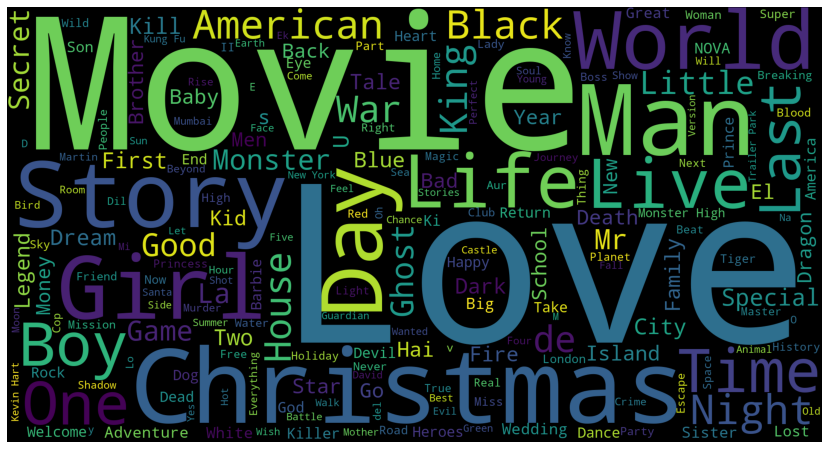

In [34]:
from wordcloud import WordCloud

plt.subplots(figsize=(15,8))
wordcloud = WordCloud(
    background_color='Black', width=1910, height=1020
).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cans.png')
plt.show() 